In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import os

import shapely
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

shapely.speedups.enable()

from tqdm import tqdm

%matplotlib inline

In [2]:
import theinputerpy as inp

In [3]:
areas=pd.read_csv('model/building_areas')

In [4]:
for index, row in areas.iterrows():
    areas.loc[index, 'geometry']=shapely.wkt.loads(row['geometry'])
    
areas=gpd.GeoDataFrame(areas, crs='EPSG:27700', geometry='geometry')

In [6]:
areas['Pervious area (%)']=100*areas['perv_area']/areas['total_area']
areas['Building area (%)']=100*areas['build_area']/areas['total_area']
areas['Street+ areas (%)']=100*(areas['imperv_area']-areas['build_area'])/areas['total_area']

Text(0.5, 1.0, 'Street+ Areas (%)')

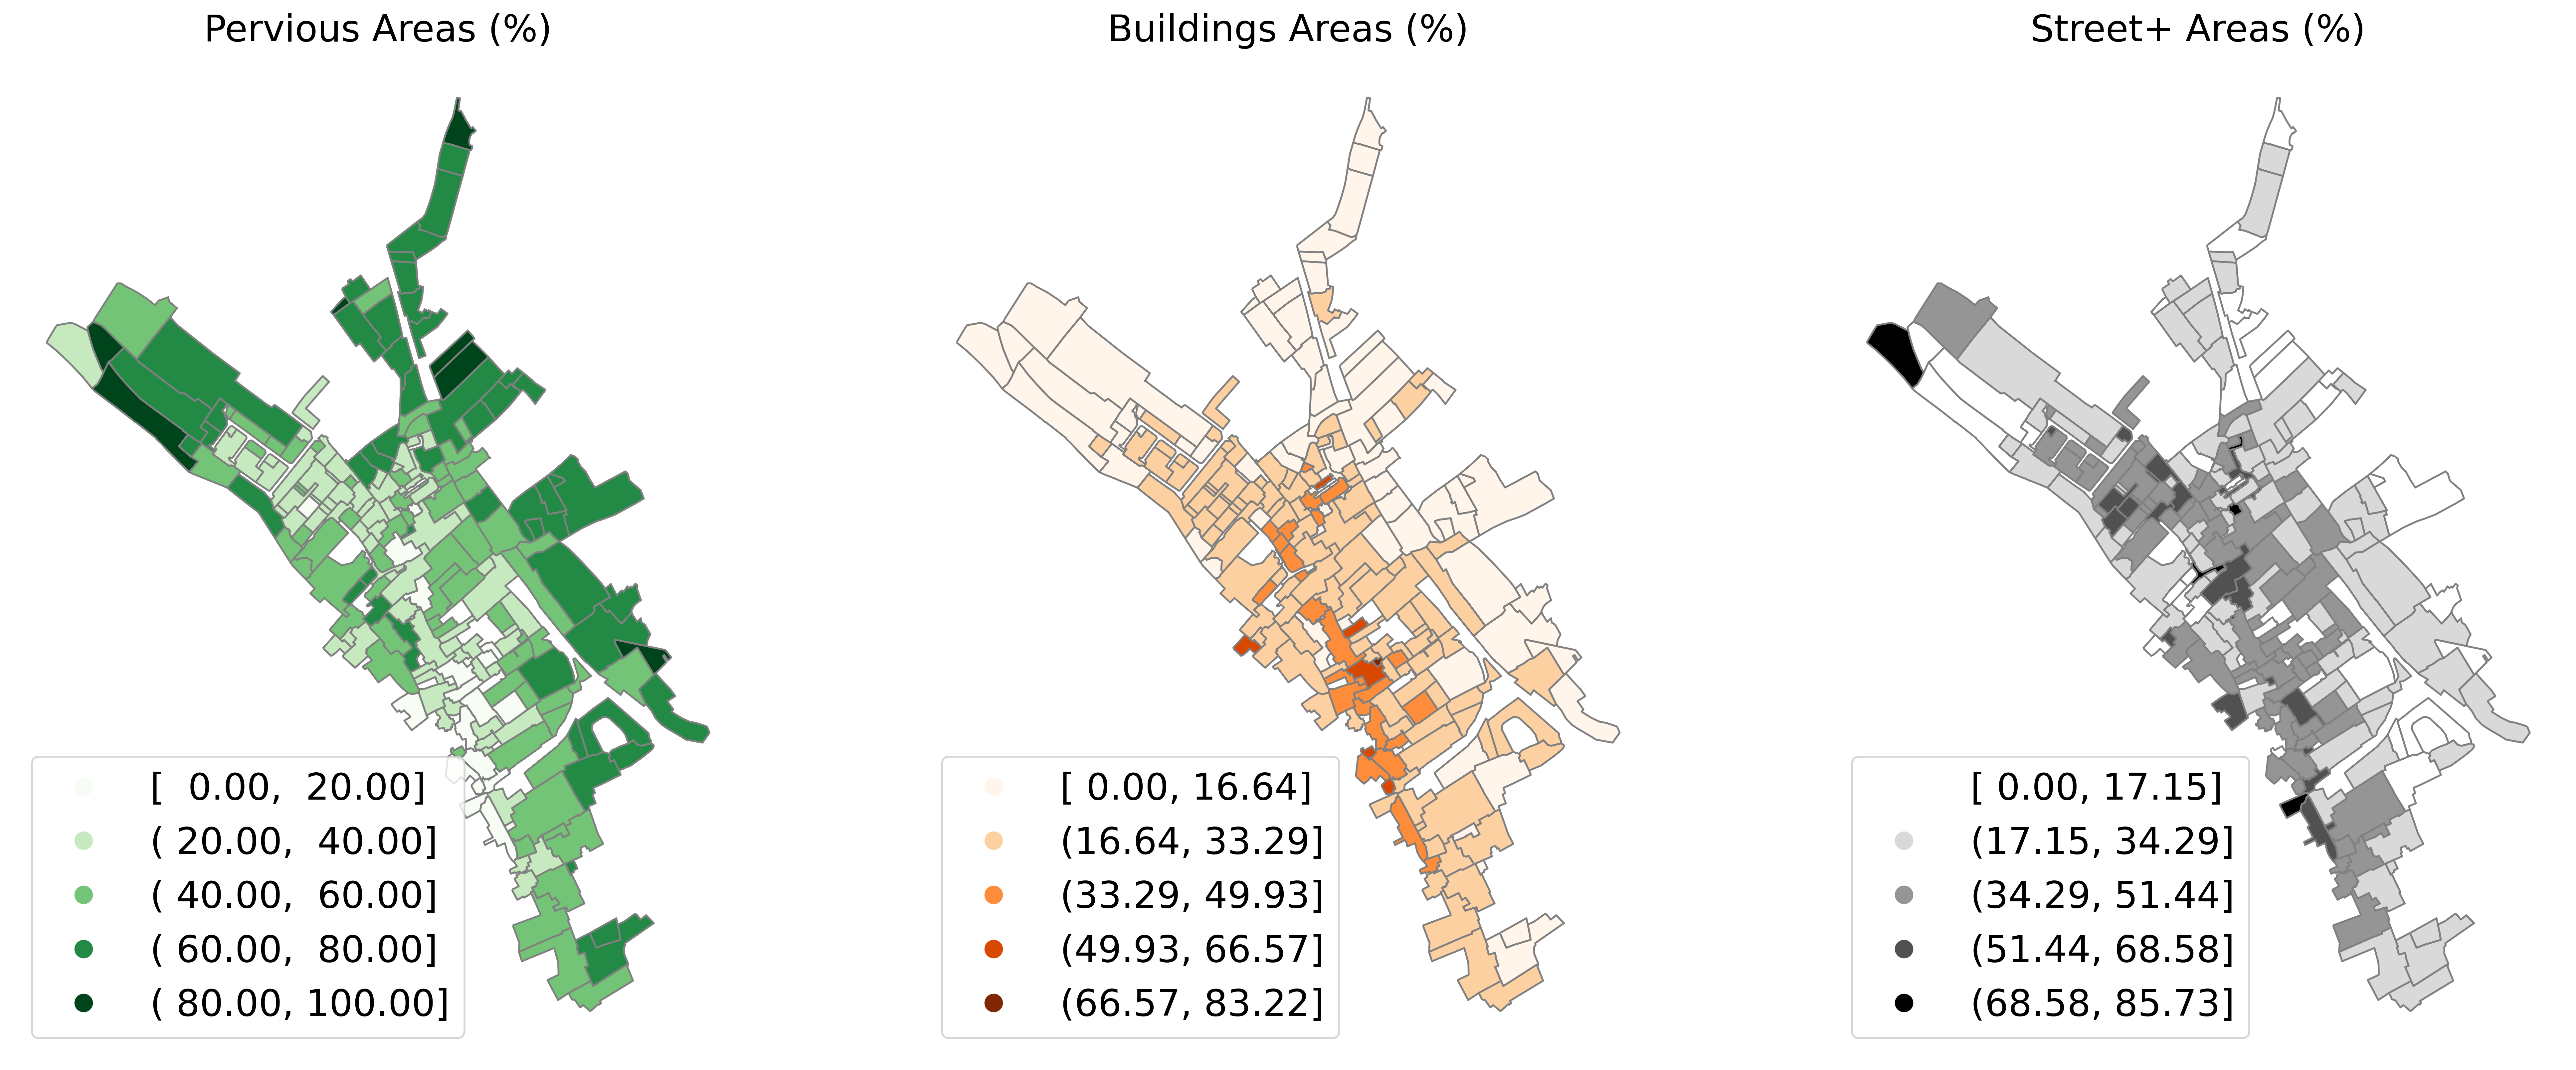

In [97]:
fig, ax=plt.subplots(1,3, figsize=(25,10),dpi=400)

areas.plot(ax=ax[0],column='Pervious area (%)', edgecolor='Grey', cmap='Greens', scheme='EqualInterval', legend=True, legend_kwds={'fontsize':20, 'loc':'lower left'})
areas.plot(ax=ax[1],column='Building area (%)', edgecolor='Grey', cmap='Oranges', scheme='EqualInterval', legend=True, legend_kwds={'fontsize':20, 'loc':'lower left'})
areas.plot(ax=ax[2],column='Street+ areas (%)', edgecolor='Grey', cmap='Greys', scheme='EqualInterval', legend=True, legend_kwds={'fontsize':20, 'loc':'lower left'})

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_title('Pervious Areas (%)', fontsize=20)
ax[1].set_title('Buildings Areas (%)', fontsize=20)
ax[2].set_title('Street+ Areas (%)', fontsize=20)


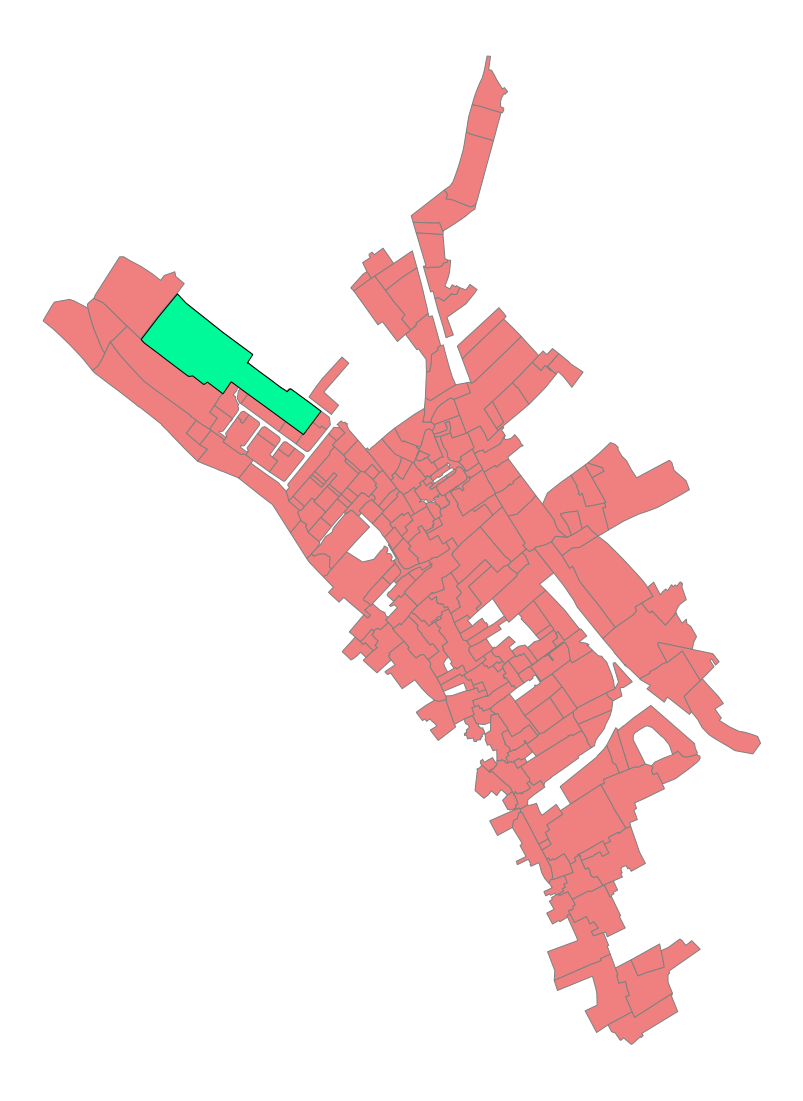

In [75]:
fig, ax =plt.subplots(figsize=(20,20))

areas.plot(ax=ax,edgecolor='Grey', color='lightcoral')
areas.nlargest(1,'total_area').plot(ax=ax,edgecolor='Black', color='mediumspringgreen')

ax.set_axis_off()

In [56]:
areas

,Unnamed: 0,Name,geometry,%Imperv,total_area,imperv_area,perv_area,build_area,Pervious area (%),Building area (%),Street+ areas (%)
0,0,SX95887722_t,"POLYGON ((295645.246 88880.248, 295652.049 888...",78.989247,9230.750953,7291.300699,1939.450254,685.615573,21.010753,7.427517,71.561731
1,1,SX95887840_t,"POLYGON ((295736.404 88912.149, 295736.750 889...",15.659091,4484.046743,702.160956,3781.885787,80.125108,84.340909,1.786893,13.872198
2,2,SX95888920_t,"POLYGON ((295750.998 88927.854, 295751.954 889...",47.304348,16090.741351,7611.620256,8479.121095,1790.824883,52.695652,11.129536,36.174812
3,3,SX95889601_t,"POLYGON ((295940.354 88648.634, 295956.110 886...",38.166667,1313.209588,501.208326,812.001262,218.894564,61.833333,16.668669,21.497997
4,4,SX95889621_t,"POLYGON ((295746.768 88777.717, 295758.600 887...",19.028571,13919.630521,2648.706836,11270.923685,1388.964980,80.971429,9.978462,9.050110
...,...,...,...,...,...,...,...,...,...,...,...
215,215,SX96894021_t,"POLYGON ((296403.644 89096.686, 296407.197 890...",21.462963,5233.891525,1123.348200,4110.543325,555.182345,78.537037,10.607448,10.855515
216,216,SX96894031_t,"POLYGON ((296407.642 89083.100, 296452.553 890...",30.750000,1224.023665,376.387277,847.636388,149.007567,69.250000,12.173585,18.576415
217,217,SX96894120_t,"POLYGON ((296471.847 89149.751, 296480.150 891...",32.530120,8271.750508,2690.810406,5580.940102,969.203332,67.469880,11.717028,20.813092
218,218,SX96895320_t,"POLYGON ((296517.104 89269.846, 296517.698 892...",36.837838,3657.683819,1347.411634,2310.272185,471.313631,63.162162,12.885576,23.952262
